In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 50.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=705079fa3035d488e5d6242ea58046f127ad7dbe3094aa9b10eb6d257d530bca
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

In [ ]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (6,456 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train.csv')
data.shape

(3706, 2)

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2023-04-05 04:39:58--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2023-04-05 04:39:58--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4b6b99e99546c2a41bf36e687.dl.dropboxusercontent.com/cd/0/get/B5mWgcDu5p3wkb1CGtckcD0JZ_-mUdm-xGek7IbYwNlAU3oue9NQ2pfMOnfWKwXUo7VfbuwFhfwe-FxtctFusuKZucMjsBL6oTNS07HNJvmbBgbNQF-0WfpJEl9Y3vRoXrz15ahIU-aVP_P0JvXZuUNcuiO0M_CpW4N6FvweVbsjnzl7anHQXmfsOAMmI5bqI-g/file?dl=1# [following]
--2023-04-05 04:39:58--  https://ucd4b6b99e99546c2a41bf36e687.dl.dropboxusercontent.com/cd/0/get/B5mWgcDu5p3w

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 10.32 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-04-05 04:41:52--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://b

In [ ]:
!pip install rank_bm25

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 90.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rank_bm25 import BM25Okapi
from itertools import combinations
import torch
from transformers import AutoTokenizer

In [ ]:
# 1. 영어만 남김

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train.csv')
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [ ]:
data['text'].str.replace(pat=r'[ㄱ-ㅣ가-힣]+', repl=r"", regex=True)
data['text'].replace('', np.nan, inplace=True)
print(data.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
data['text'] = data['text'].apply(lambda x: x+ '\n')

In [ ]:
data['text']

0       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
2       glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
3       tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
4       filename = TEST_IMAGE + str(round(frame_sec)) ...
                              ...                        
3701    토큰화 이후 train val 를 분리하고 각 train set, val set에 ...
3702    올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...
3703    수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...
3704    inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...
3705    상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...
Name: text, Length: 3706, dtype: object

- 데이터 전처리

In [ ]:
import re

In [ ]:
def text_clean(df,col):

  for i in range(len(df)):
    df[col][i] = df[col][i].lower() # 모든 코드를 소문자로
    df[col][i] = df[col][i].encode('ascii', 'ignore').decode()  # 유니코드 문자 제거
    df[col][i] = re.sub(r'https*\S+', ' ', df[col][i]) # 링크 제거
    df[col][i] = re.sub(r'http*\S+', ' ', df[col][i])

  return df

In [ ]:
def remove_space(df,col):
    # 불규칙한 띄어쓰기 형태 통일 (앞뒤 공백 삭제)
    splist1=[" == "," ==","== "]
    splist2=[" >= "," >=",">= "]
    splist3=[' <= '," <=","<= "]
    splist4=[' > '," >","> "]
    splist5=[' < '," <","< "]

    splist_1=[' + ', ' +', '+ ']
    splist_2=[' - ', ' -', '- ']
    splist_3=[' / ', ' /', '/ ']
    splist_4=[' // ', ' //', '// ']
    splist_5=[' % ', ' %', '% ']
    splist_6=[' : ', ' :', ': ']
    splist_7=[' , ', ' ,', ', ']
    splist_8=[' * ', ' *', '* ']
    splist_9=[' ** ', ' **', '** ']

    splist__1=[" = ", "= ", " ="]
    splist__2=[' != '," !=","!= "]
    splist__3=[' += ', ' +=', '+= ']
    splist__4=[' -= ', ' -=', '-= ']
    splist__5=[' *= ', ' *=', '*= ']
    splist__6=[' /= ', ' /=', '/= ']
    splist__7=[' %= ', ' %=', '%= ']
    splist__8=[' //= ', ' //=', '//= ']
    splist__9=[' **= ', ' **=', '**= ']

    for i in range(0,len(df)):
      for k in range(0,3):
        df[col][i] = df[col][i].replace(splist1[k], '==')
        df[col][i] = df[col][i].replace(splist2[k], '>=')
        df[col][i] = df[col][i].replace(splist3[k], '<=')
        df[col][i] = df[col][i].replace(splist4[k], '>')
        df[col][i] = df[col][i].replace(splist5[k], '<')
        
        df[col][i] = df[col][i].replace(splist_1[k], '+')
        df[col][i] = df[col][i].replace(splist_2[k], '-')
        df[col][i] = df[col][i].replace(splist_3[k], '/')
        df[col][i] = df[col][i].replace(splist_4[k], '//')
        df[col][i] = df[col][i].replace(splist_5[k], '%')
        df[col][i] = df[col][i].replace(splist_6[k], ':')
        df[col][i] = df[col][i].replace(splist_7[k], ',')
        df[col][i] = df[col][i].replace(splist_8[k], '*')
        df[col][i] = df[col][i].replace(splist_9[k], '**')
        
        df[col][i] = df[col][i].replace(splist__1[k], '=')
        df[col][i] = df[col][i].replace(splist__2[k], '!=')
        df[col][i] = df[col][i].replace(splist__3[k], '+=')
        df[col][i] = df[col][i].replace(splist__4[k], '-=')
        df[col][i] = df[col][i].replace(splist__5[k], '*=')
        df[col][i] = df[col][i].replace(splist__6[k], '/=')
        df[col][i] = df[col][i].replace(splist__7[k], '%=')
        df[col][i] = df[col][i].replace(splist__8[k], '//=')
        df[col][i] = df[col][i].replace(splist__9[k], '**=')
        
    return df

In [ ]:
def make_space(df, col):

    pattern1 = '#.*\n' # 주석제거
    pattern2 = '"""(.*?)"""\n' # ''' 주석제거
    pattern3 = "'''.*'''\n" # """ 주석제거
    pattern4 = '    ' # 탭 바꾸기
    pattern5 = '\n{2,}' # 엔터 여러줄 한개로 바꾸기
    pattern6 = '='
    pattern7 = ' =  = '
    pattern8 = '>'
    pattern9 = '<'
    pattern10 = '[+]'
    pattern11 = '-'
    pattern12 = ' >  = '
    pattern13 = ' <  = '
    pattern14 = '/'
    pattern15 = ' /  / '
    pattern16 = '%'
    pattern17 = ' %  = '
    pattern18 = '! = '
    pattern19 = ':'
    pattern20 = ','
    pattern21 = ' [+]  [=] '
    pattern22 = ' -  = '
    pattern23 = '[*]'
    pattern24 = ' [*]  [*] '
    pattern25 = ' /  = '
    pattern26 = ' /  /= '
    pattern27 = ' [*]  = '
    pattern28 = ' [*]  [*]= '
   
    df[col] = df[col].str.replace(re.compile(pattern1), '')
    df[col] = df[col].str.replace(re.compile(pattern2, re.DOTALL), '')
    df[col] = df[col].str.replace(re.compile(pattern3, re.DOTALL), '')
    df[col] = df[col].str.replace(re.compile(pattern4, re.DOTALL), '\t')
    df[col] = df[col].str.replace(re.compile(pattern5, re.DOTALL), '\n')
    df[col] = df[col].str.replace(re.compile(pattern6, re.DOTALL), ' = ')
    df[col] = df[col].str.replace(re.compile(pattern7, re.DOTALL), ' == ')
    df[col] = df[col].str.replace(re.compile(pattern8, re.DOTALL), ' > ')
    df[col] = df[col].str.replace(re.compile(pattern9, re.DOTALL), ' < ')
    df[col] = df[col].str.replace(re.compile(pattern10, re.DOTALL), ' + ')
    df[col] = df[col].str.replace(re.compile(pattern11, re.DOTALL), ' - ')
    df[col] = df[col].str.replace(re.compile(pattern12, re.DOTALL), ' >= ')
    df[col] = df[col].str.replace(re.compile(pattern13, re.DOTALL), ' <= ')
    df[col] = df[col].str.replace(re.compile(pattern14, re.DOTALL), ' / ')
    df[col] = df[col].str.replace(re.compile(pattern15, re.DOTALL), ' // ')
    df[col] = df[col].str.replace(re.compile(pattern16, re.DOTALL), ' % ')
    df[col] = df[col].str.replace(re.compile(pattern17, re.DOTALL), ' %= ')
    df[col] = df[col].str.replace(re.compile(pattern18, re.DOTALL), ' != ')
    df[col] = df[col].str.replace(re.compile(pattern19, re.DOTALL), ': ') #뒤에만 공백 추가
    df[col] = df[col].str.replace(re.compile(pattern20, re.DOTALL), ', ') #뒤에만 공백 추가
    df[col] = df[col].str.replace(re.compile(pattern21, re.DOTALL), ' += ')
    df[col] = df[col].str.replace(re.compile(pattern22, re.DOTALL), ' -= ')
    df[col] = df[col].str.replace(re.compile(pattern23, re.DOTALL), ' * ')
    df[col] = df[col].str.replace(re.compile(pattern24, re.DOTALL), ' ** ')
    df[col] = df[col].str.replace(re.compile(pattern25, re.DOTALL), ' /= ')
    df[col] = df[col].str.replace(re.compile(pattern26, re.DOTALL), ' //= ')
    df[col] = df[col].str.replace(re.compile(pattern27, re.DOTALL), ' *= ')
    df[col] = df[col].str.replace(re.compile(pattern28, re.DOTALL), ' **= ')

    return df

In [ ]:
func1 = text_clean(data, 'text')

In [ ]:
func1

,text,label
0,"self.convs1 = nn.modulelist([nn.conv2d(1, co, ...",코드2
1,... .. . \n,웹
2,glob.glob(path) .\n\npath [ ] .\n\n...,코드2
3,"tmpp = tmp.groupby(by = 'addr1', as_index=fals...",코드2
4,filename = test_image + str(round(frame_sec)) ...,코드2
...,...,...
3701,"train val train set, val set \n count...",코드2
3702,? ?\n ?\n,시스템 운영
3703,cacoo packet tracer \n\n1. it \n- ...,이론
3704,inplace =true none . ..? \n,원격


In [ ]:
func2 = remove_space(func1, 'text')

In [ ]:
func2

,text,label
0,"self.convs1=nn.modulelist([nn.conv2d(1,co,(k,1...",코드2
1,... .. . \n,웹
2,glob.glob(path) .\n\npath [ ] .\n\n...,코드2
3,"tmpp=tmp.groupby(by='addr1',as_index=false)[['...",코드2
4,"filename=test_image+str(round(frame_sec))+"".jp...",코드2
...,...,...
3701,"train val train set,val set \n countv...",코드2
3702,? ?\n ?\n,시스템 운영
3703,cacoo packet tracer \n\n1. it \n- ...,이론
3704,inplace=true none . ..? \n,원격


In [ ]:
func3 = make_space(func2, 'text')

In [ ]:
func3

,text,label
0,"self.convs1 = nn.modulelist([nn.conv2d(1, co, ...",코드2
1,\t\t\t ...\t ..\t . \n,웹
2,glob.glob(path)\t.\npath [ ]\t\t .\n aivle_3r...,코드2
3,"tmpp = tmp.groupby(by = 'addr1', as_index = fa...",코드2
4,filename = test_image + str(round(frame_sec)) ...,코드2
...,...,...
3701,"train val\ttrain set, val set \n\tcountveto...",코드2
3702,\t?\t ?\n\t ?\n,시스템 운영
3703,cacoo packet tracer \n1. it\t \n - \t\t\t .\...,이론
3704,inplace = true\t none . ..?\t\n,원격


In [ ]:
def one_blank(df, col):
  
  pattern6 = '[\n\t\s]' # \n \t \s를 공백 하나로 바꾸기
  df[col] = df[col].str.replace(pattern6, ' ')
  
  return df

In [ ]:
def one_line(df, col):
    pattern1 = '  ' #2칸
    pattern2 = '   ' #3칸
    pattern3 = '    ' #4칸
    pattern4 = '     ' #5칸
    pattern5 = '      ' #6칸
    pattern6 = '       ' #7칸
    pattern7 = '        ' #8칸
    
    df[col] = df[col].str.replace(pattern7, ' ')
    df[col] = df[col].str.replace(pattern6, ' ')
    df[col] = df[col].str.replace(pattern5, ' ')
    df[col] = df[col].str.replace(pattern4, ' ')
    df[col] = df[col].str.replace(pattern3, ' ')
    df[col] = df[col].str.replace(pattern2, ' ')
    df[col] = df[col].str.replace(pattern1, ' ')

    return df

In [ ]:
func4 = one_blank(func3, 'text')

<ipython-input-30-57f4649e2c0f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(pattern6, ' ')


In [ ]:
func5 = one_line(func4, 'text')

In [ ]:
func5.to_csv('/content/drive/MyDrive/미니프로젝트4차/train_eng.csv', index=False)

In [ ]:
data = func5

In [ ]:
data['text'].apply

<bound method Series.apply of 0       self.convs1 = nn.modulelist([nn.conv2d(1, co, ...
1                                               ... .. . 
2       glob.glob(path) . path [ ] . aivle_3rd[team] ,...
3       tmpp = tmp.groupby(by = 'addr1', as_index = fa...
4       filename = test_image + str(round(frame_sec)) ...
                              ...                        
3701     train val train set, val set countvetorizer, ...
3702                                               ? ? ? 
3703     cacoo packet tracer 1. it - . , , . ...? 2. (...
3704                           inplace = true none . ..? 
3705                                         p - value ? 
Name: text, Length: 3706, dtype: object>

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('microsoft/graphcodebert-base')
tokenizer.truncation_side = 'left' #적용 안됨
data['graphcodebert_tokens'] = data['text'].apply(tokenizer.tokenize)
for i in range(0, len(data)):
  data['graphcodebert_tokens'][i] = data['graphcodebert_tokens'][i][:512]

data['graphcodebert_len'] = data['graphcodebert_tokens'].apply(len)
data.describe()

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


,graphcodebert_len
count,3706.000000
mean,37.223152
std,71.062426
min,0.000000
25%,5.000000
50%,12.000000
75%,34.000000
max,512.000000


In [ ]:
data

,text,label,graphcodebert_tokens,graphcodebert_len
0,"self.convs1 = nn.modulelist([nn.conv2d(1, co, ...",코드2,"[self, ., con, vs, 1, Ġ=, Ġn, n, ., module, li...",42
1,... .. .,웹,"[Ġ..., Ġ.., Ġ., Ġ]",4
2,"glob.glob(path) . path [ ] . aivle_3rd[team] ,...",코드2,"[gl, ob, ., gl, ob, (, path, ), Ġ., Ġpath, Ġ[,...",26
3,"tmpp = tmp.groupby(by = 'addr1', as_index = fa...",코드2,"[tm, pp, Ġ=, Ġtmp, ., group, by, (, by, Ġ=, Ġ'...",104
4,filename = test_image + str(round(frame_sec)) ...,코드2,"[filename, Ġ=, Ġtest, _, image, Ġ+, Ġstr, (, r...",24
...,...,...,...,...
3701,"train val train set, val set countvetorizer, ...",코드2,"[Ġtrain, Ġval, Ġtrain, Ġset, ,, Ġval, Ġset, Ġc...",18
3702,? ? ?,시스템 운영,"[Ġ?, Ġ?, Ġ?, Ġ]",4
3703,"cacoo packet tracer 1. it - . , , . ...? 2. (...",이론,"[Ġcac, oo, Ġpacket, Ġtr, acer, Ġ1, ., Ġit, Ġ-,...",56
3704,inplace = true none . ..?,원격,"[in, place, Ġ=, Ġtrue, Ġnone, Ġ., Ġ.., ?, Ġ]",9


In [ ]:
data['label'] = data['label'].map({
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
})

In [ ]:
model_checkpoint = "huggingface/CodeBERTa-small-v1"

In [ ]:
from sklearn.model_selection import train_test_split
batch_size = 32
wd = 0.01
lr = 2e-5
epochs = 30
task = 'categorical_classification'
label_list = [0, 1, 2, 3, 4]
num_labels = 5
def seed_everything(seed:42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore
seed_everything(42)
train_data, val_data = train_test_split(data, random_state=42, test_size=.2)

In [ ]:
!pip install transformers
!pip install transformers datasets

import tensorflow as tf
import transformers
import torch
import keras
import re

import pandas as pd
import numpy as np
import random
import time
import datetime
import sys
import matplotlib.pyplot as plt
import os
import json
import csv
csv.field_size_limit(sys.maxsize)

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import AutoTokenizer, Trainer, TrainingArguments, DataCollatorWithPadding, AutoModel, AutoModelForSequenceClassification,DataCollatorForTokenClassification,EarlyStoppingCallback
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

from datasets import load_dataset, load_metric, Dataset
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train = pd.DataFrame({
    "text": train_data['text'],
    "label": train_data['label']
})
df_val = pd.DataFrame({
    'text': val_data['text'],
    'label': val_data['label']
})
dataset_train = Dataset.from_pandas(df_train)
dataset_val = Dataset.from_pandas(df_val)

In [ ]:
try:
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
except:
    time.sleep(5)
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at huggingface/CodeBERTa-small-v1 and a

In [ ]:
assert isinstance(tokenizer, transformers.PreTrainedTokenizerFast)

def tokenize_function(examples):
    return tokenizer(examples["text"],padding="max_length", max_length = 512,truncation=True)

tokenized_train_datasets= dataset_train.map(tokenize_function, batched=True)
tokenized_val_datasets = dataset_val.map(tokenize_function, batched=True)

Map:   0%|          | 0/2964 [00:00<?, ? examples/s]

Map:   0%|          | 0/742 [00:00<?, ? examples/s]

In [ ]:
args = TrainingArguments(
    f"test-{task}",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate= lr,#2e-5
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    seed = 42,
    weight_decay=wd,load_best_model_at_end=True,)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_train_datasets,
    eval_dataset=tokenized_val_datasets,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
    
)
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.843875,0.661725
2,No log,0.791468,0.708895
3,No log,0.789682,0.725067
4,No log,0.857567,0.681941
5,No log,0.873798,0.710243
6,0.711600,0.891799,0.718329


TrainOutput(global_step=558, training_loss=0.6823482479245859, metrics={'train_runtime': 234.6654, 'train_samples_per_second': 378.922, 'train_steps_per_second': 11.889, 'total_flos': 2355926254755840.0, 'train_loss': 0.6823482479245859, 'epoch': 6.0})

In [ ]:
# 1. 한국어만 남김
data['text'] = data['text'].str.replace(pat=r'[A-Za-z0-9]+',repl=r"", regex=True)
data['text'].replace('', np.nan, inplace=True)
print(data.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
data['text'] = data['text'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)

In [ ]:
data['text'].replace('',np.nan, inplace=True)
print(data.isnull().sum())

text     0
label    0
dtype: int64


In [ ]:
from konlpy.tag import Mecab
from collections import Counter

In [ ]:
# 데이터프레임에 매핑
for i in range(len(data['text'])):
  mecab = Mecab()
  temp =  [j[0] for j in mecab.pos(data['text'][i]) if j[1] == 'NNG' or j[1] == 'NNP']
  data['text'][i] = ' '.join(map(str, temp))

In [ ]:
data.head(10)

,text,label
0,커널 사이즈 단어 최대 길 가정 선언,코드2
1,이미지 업로드 자바 스크립트 동적 폼 생성 클릭 기본 예제 코드 이유,웹
2,사용 때 질문 포함 작동 질문 제공 파일 폴더 포함 폴더 정상 작동,코드2
3,오류 해결,코드2
4,폴더 이미지 저장 이해 실행 폴더 이미지 저장 질문,코드2
5,헬스 정신 건강 관심 디지털 치료제 관련 서비스 기획 기업 프로젝트 희망 정신 건강...,이론
6,파일 페이지 안사 인프라 구성 웹 서버 통합 제시 때 배치 작성 이중 표현 작성 통...,웹
7,범주 데이터 숫자 데이터 설명 내용 적응 아래 첨부 파일 실습 데이터 릉 시간 데이...,이론
8,첨부 파일 정답 코드 시 패스 출력 문제 요구 오답 경우 코드 웹 해킹 공부 큰따옴...,코드1
9,오타 확인 오타 해당 파일 확인 문제 동일 이미지 마크 해당 이미지 파일,웹


In [ ]:
data.shape

(3706, 2)

In [ ]:
data.to_csv('/content/drive/MyDrive/미니프로젝트4차/train_kor.csv', index=False)

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train_kor.csv')
a.drop('label', axis=1, inplace=True)

In [ ]:
a.to_csv('/content/drive/MyDrive/미니프로젝트4차/a_kor.csv')

In [ ]:
f = open('/content/drive/MyDrive/미니프로젝트4차/a_kor.csv', 'r')
news = f.read()

# 한글 명사 빈도 계산
from konlpy.tag import Mecab
from collections import Counter

mecab = Mecab()
noun = mecab.nouns(news)

sparse = []

# 한글자인 명사는 sparse_key에 넣기
for i, v in enumerate(noun):
  if len(v) < 2 and v != '웹':
     sparse.append(noun.pop(i))
count = Counter(noun)


# 명사 빈도를 세었을 때 2회 빈도 이하이면 sparse_key에 담기

for k, v in count.items():
  # v가 2이하이면 sparse_key에 담기
  if v <= 2:
    sparse.append(k) 

In [ ]:
print(sparse)

['길', '폼', '때', '때', '릉', '값', '과', '시', '리', '결', '행', '결', '결', '달', '때', '값', '값', '말', '값', '문', '위', '답', '과', '후', '인', '문', '위', '문', '뒤', '앞', '과', '줄', '상', '행', '상', '수', '수', '수', '값', '문', '표', '위', '위', '때', '후', '때', '값', '뜻', '뜻', '때', '밑', '때', '값', '때', '곳', '문', '문', '문', '창', '값', '액', '뒤', '업', '업', '문', '문', '후', '차', '값', '값', '값', '값', '점', '값', '위', '문', '문', '조', '후', '창', '위', '문', '때', '값', '숫', '끝', '끝', '전', '탭', '인', '문', '창', '문', '결', '결', '결', '션', '예', '귀', '값', '때', '합', '반', '위', '뒤', '말', '창', '때', '때', '답', '후', '시', '과', '값', '값', '값', '을', '레', '말', '개', '값', '문', '옆', '월', '값', '위', '앞', '책', '방', '문', '값', '후', '값', '터', '위', '끝', '위', '문', '북', '옆', '캠', '팀', '캠', '폰', '캠', '맵', '문', '값', '후', '섬', '때', '안', '안', '팁', '때', '선', '후', '후', '란', '과', '문', '장', '문', '차', '뒤', '답', '수', '값', '때', '후', '팀', '값', '문', '값', '법', '값', '법', '도', '창', '점', '개', '후', '점', '때', '전', '때', '값', '을', '위', '위', '예', '원', '과', '문', '문', '창', '창', '앞', '문', '차',

In [ ]:
cn = Counter(sparse)

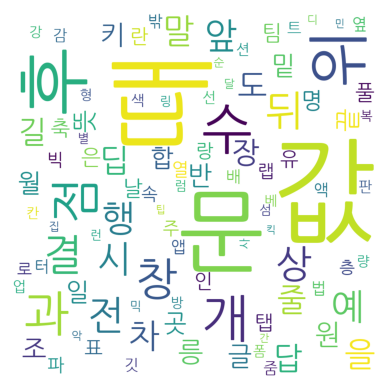

In [ ]:
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                 background_color='white',
                 width=1000,
                 height=1000,
                 max_words=100,
                 max_font_size=300).generate_from_frequencies(dict(cn))

plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

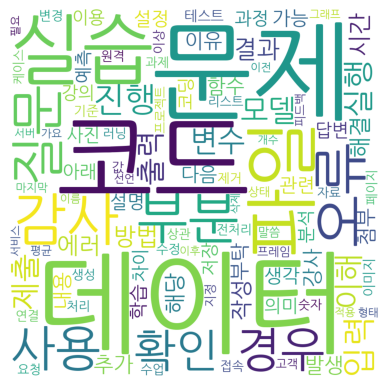

In [ ]:
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                 background_color='white',
                 width=1000,
                 height=1000,
                 max_words=100,
                 max_font_size=300).generate_from_frequencies(dict(count))

plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# - sparse에 불용어 저장되어있음

In [ ]:
# 2. 영어만 남김
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train.csv')
data['text'] = data['text'].str.replace(pat=r'[ㄱ-ㅣ가-힣0-9]+',repl=r"", regex=True)
data['text'] = data['text'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
data['text'][3]

'tmpp   tmp groupby by    Addr   as_index False    Category    sum     plt figure figsize       plt bar tmpp  Addr    tmpp  Category     plt ticklabel_format axis  y   style  plain   plt show        unsupported operand type s  for     str  and  int          '

In [ ]:
# SL태그는 외국어라는 뜻
for i in range(len(data['text'])):
  mecab = Mecab()
  temp =  [j[0] for j in mecab.pos(data['text'][i]) if j[1] == 'SL'] #SL태그는 외국어라는 뜻
  data['text'][i] = ' '.join(map(str, temp))

In [ ]:
data.to_csv('/content/drive/MyDrive/미니프로젝트4차/train_eng.csv', index=False)

In [ ]:
b = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train_eng.csv')
b.drop('label', axis=1, inplace=True)

In [ ]:
b['text'] = b['text'].fillna(" ")

In [ ]:
b.to_csv('/content/drive/MyDrive/미니프로젝트4차/b_eng.csv')

In [ ]:
b.head()

,text
0,self convs nn ModuleList nn Convd Co K for K i...
1,
2,glob glob PATH PATH AIVLE rd Team glob
3,tmpp tmp groupby by Addr as index False Catego...
4,filename TEST IMAGE str round frame sec jpg te...


In [ ]:
import nltk
nltk.download('all')

In [ ]:
f = open('/content/drive/MyDrive/미니프로젝트4차/b_eng.csv', 'r')
news = f.read()

from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

mecab = Mecab()
tmp = mecab.pos(news)

lst = []
for i in range(len(tmp)):
  if tmp[i][1] == 'SL':
    lst.append(tmp[i][0])

sparse2 = []
for i, v in enumerate(lst):
  if len(v) < 2:
    sparse2.append(lst.pop(i))
count_eng = Counter(lst)


for k, v in count_eng.items():
  if v <= 2:
    sparse2.append(k)

print(sparse2)

['K', 'K', 'K', 'y', 's', 'R', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'i', 'x', 'x', 'x', 'x', 'x', 'y', 'x', 'y', 'x', 'R', 'R', 'a', 'X', 'p', 'X', 'y', 'p', 'i', 'x', 'i', 'y', 'i', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'X', 'X', 'y', 'F', 's', 'E', 'a', 'c', 'n', 'd', 't', 't', 'X', 'O', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'y', 'x', 'x', 's', 'x', 'm', 'g', 'X', 'm', 'g', 'X', 'X', 'n', 'n', 'n', 'd', 'w', 'b', 'w', 'w', 'A', 'B', 'b', 'w', 'b', 'w', 'n', 'm', 'm', 'm', 'm', 'x', 'y', 'r', 'K', 'i', 'N', 'i', 'N', 'j', 'N', 'j', 'P', 'j', 'j', 'j', 'i', 'N', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'f', 'i', 'i', 'f', 'i', 'i', 'R', 'f', 'c', 'a', 'f', 'g', 'i', 'f', 'i', 'b', 'i', 'a', 'z', 'g', 'z', 'c', 'i', 'c', 'i', 'c', 'i', 'c', 'i', 'c', 't', 'i', 'c', 'j', 'c', 'j', 'z', 'i', 'j', 'c', 't', 'd', 'i', 'c', 'j', 'c', 'c', 'j', 't', 'i', 't', 'i', 'c', 'j', 'c', 'j', 'z', 'i', 'j', 'd', 'C', 'p', 'C', 'f', 'a', 'f', 'f', 'a',

In [ ]:
sparse_eng_cnt = Counter(sparse2)
print(sparse_eng_cnt)
# sparse2도 불용어 사전에 추가.

Counter({'a': 747, 'i': 686, 'x': 686, 'y': 405, 'n': 358, 'b': 259, 'C': 195, 's': 188, 'c': 180, 'd': 154, 'f': 146, 'N': 132, 'j': 122, 'p': 117, 'A': 112, 'k': 112, 't': 78, 'B': 76, 'X': 74, 'r': 72, 'Q': 63, 'v': 63, 'm': 62, 'M': 58, 'z': 54, 'S': 52, 'e': 50, 'D': 50, 'g': 48, 'R': 46, 'q': 42, 'P': 39, 'l': 34, 'h': 31, 'K': 30, 'F': 22, 'o': 22, 'T': 21, 'w': 20, 'E': 16, 'L': 16, 'Y': 12, 'u': 12, 'G': 11, 'J': 10, 'O': 9, 'U': 6, 'V': 5, 'H': 4, 'Z': 3, 'I': 3, 'W': 3, 'convs': 1, 'nn': 1, 'ModuleList': 1, 'Convd': 1, 'Co': 1, 'Ks': 1, 'Team': 1, 'Category': 1, 'interpreted': 1, 'All': 1, 'OneDrive': 1, 'Master': 1, 'conv': 1, 'featuremap': 1, 'findwork': 1, 'adding': 1, 'charts': 1, 'sites': 1, 'AlreadyRegistered': 1, 'registered': 1, 'FA': 1, 'FAM': 1, 'FAMI': 1, 'FAMIL': 1, 'FAMILY': 1, 'Level': 1, 'Bin': 1, 'fewer': 1, 'edges': 1, 'used': 1, 'intermediate': 1, 'foreign': 1, 'Tag': 1, 'NP': 1, 'LT': 1, 'Gridsearch': 1, 'takes': 1, 'were': 1, 'bs': 1, 'environments': 1, '

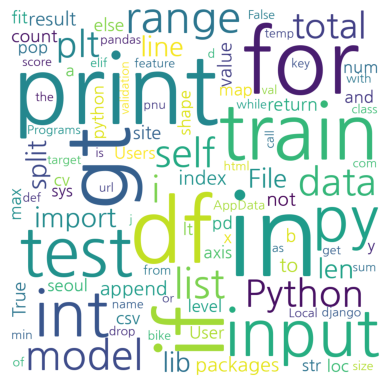

In [ ]:
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                 background_color='white',
                 width=1000,
                 height=1000,
                 max_words=100,
                 max_font_size=300).generate_from_frequencies(dict(count_eng))

plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

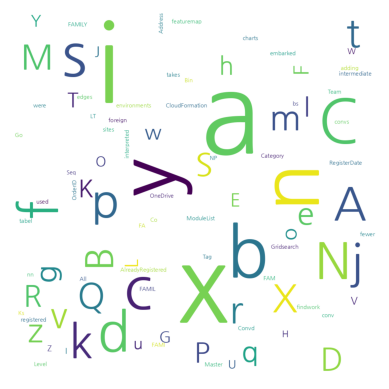

In [ ]:
# 코드에서 한 글자 단위의 명사가 이렇게나 많은 거는 코드에서 변수로 사용했기 떄문이라고 추정
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                 background_color='white',
                 width=1000,
                 height=1000,
                 max_words=100,
                 max_font_size=300).generate_from_frequencies(dict(sparse_eng_cnt))

plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
total = []
for i in sparse:
  total.append(i)
for j in sparse2:
  total.append(j)
print(total)

['길', '폼', '때', '때', '릉', '값', '과', '시', '리', '결', '행', '결', '결', '달', '때', '값', '값', '말', '값', '문', '위', '답', '과', '후', '인', '문', '위', '문', '뒤', '앞', '과', '줄', '상', '행', '상', '수', '수', '수', '값', '문', '표', '위', '위', '때', '후', '때', '값', '뜻', '뜻', '때', '밑', '때', '값', '때', '곳', '문', '문', '문', '창', '값', '액', '뒤', '업', '업', '문', '문', '후', '차', '값', '값', '값', '값', '점', '값', '위', '문', '문', '조', '후', '창', '위', '문', '때', '값', '숫', '끝', '끝', '전', '탭', '인', '문', '창', '문', '결', '결', '결', '션', '예', '귀', '값', '때', '합', '반', '위', '뒤', '말', '창', '때', '때', '답', '후', '시', '과', '값', '값', '값', '을', '레', '말', '개', '값', '문', '옆', '월', '값', '위', '앞', '책', '방', '문', '값', '후', '값', '터', '위', '끝', '위', '문', '북', '옆', '캠', '팀', '캠', '폰', '캠', '맵', '문', '값', '후', '섬', '때', '안', '안', '팁', '때', '선', '후', '후', '란', '과', '문', '장', '문', '차', '뒤', '답', '수', '값', '때', '후', '팀', '값', '문', '값', '법', '값', '법', '도', '창', '점', '개', '후', '점', '때', '전', '때', '값', '을', '위', '위', '예', '원', '과', '문', '문', '창', '창', '앞', '문', '차',

In [ ]:
with open('/content/drive/MyDrive/미니프로젝트4차/spare_data.txt', 'w') as f:
  for k in total:
    f.write(k+'\n')

In [ ]:
t = []
f =  open('/content/drive/MyDrive/미니프로젝트4차/희귀단어.txt', 'r')
while True:
  lines = f.readline().strip()
  if not lines: break
  t.append(lines)  
print(t)


['신택스', '이용한', 'leakage', 'benign', 'malicious', 'egg', 'pretrainded', '소괄호', '당산', '갑문', 'sklean', 'xgboosting', '장단점', '낮', '대만', '조건식', 'intent', 'analysis', '명령문', 'xhr', 'reponse', '검수', '출발선', '완전', 'ng', 'gnuboard', 'aksemfrh', '래퍼', 'kl', '행복', '이스', '리스', '실버', '타사', '후기', 'gpa', 'ppcnosuchelementexception', 'ontainernamedobjectpath', '교수', 'job', '잡서', '칭', '마인', '편성', '바디', '헤드', '영구', '측정값', '히트', '표현식', 'complie', 'addfile', 'alt', '부정행위', 'spacedesk', '조장', '코코', '무언가', '짜도', '철자', 'igw', '아리', '빈', 'ydata', 'whisker', '지장', 'queryset', 'dj', '느', '리서치', '그릴', 'pillow', 'rg', 'gr', 'bg', 'br', 'rr', 'gg', '와중', '불순', '소유', '엔지니어', '지', '플러스', '대형', '창출', '로켓', '와우', 'unfortunately', 'likely', 'due', 'misconfiguration', 'way', 'cgroups', 'disabled', 'teain', 'hiddenlayer', 'outputlayer', 'funtion', '자치', 'viewer', '엄두', 'keywords', 'mspe', '색시', 'either', '육상', '수산', '내수면', '육성', 'websever', 'humid', '눈대중', 'trainc', 'valc', '띄어쓰기', '목요일', 'gitlab', '경남', 'gallery', 'delet

In [ ]:
total = []
for i in t:
  total.append(i)
for j in sparse:
  total.append(j)
for k in sparse2:
  total.append(k)
print(total)

['신택스', '이용한', 'leakage', 'benign', 'malicious', 'egg', 'pretrainded', '소괄호', '당산', '갑문', 'sklean', 'xgboosting', '장단점', '낮', '대만', '조건식', 'intent', 'analysis', '명령문', 'xhr', 'reponse', '검수', '출발선', '완전', 'ng', 'gnuboard', 'aksemfrh', '래퍼', 'kl', '행복', '이스', '리스', '실버', '타사', '후기', 'gpa', 'ppcnosuchelementexception', 'ontainernamedobjectpath', '교수', 'job', '잡서', '칭', '마인', '편성', '바디', '헤드', '영구', '측정값', '히트', '표현식', 'complie', 'addfile', 'alt', '부정행위', 'spacedesk', '조장', '코코', '무언가', '짜도', '철자', 'igw', '아리', '빈', 'ydata', 'whisker', '지장', 'queryset', 'dj', '느', '리서치', '그릴', 'pillow', 'rg', 'gr', 'bg', 'br', 'rr', 'gg', '와중', '불순', '소유', '엔지니어', '지', '플러스', '대형', '창출', '로켓', '와우', 'unfortunately', 'likely', 'due', 'misconfiguration', 'way', 'cgroups', 'disabled', 'teain', 'hiddenlayer', 'outputlayer', 'funtion', '자치', 'viewer', '엄두', 'keywords', 'mspe', '색시', 'either', '육상', '수산', '내수면', '육성', 'websever', 'humid', '눈대중', 'trainc', 'valc', '띄어쓰기', '목요일', 'gitlab', '경남', 'gallery', 'delet

In [ ]:
with open('/content/drive/MyDrive/미니프로젝트4차/희귀단어모두.txt', 'w') as f:
  for k in total:
    f.write(k+'\n')

In [ ]:
# train_kor와 train_eng 합치기

In [ ]:
train_kor = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train_kor.csv')

In [ ]:
train_eng = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train_eng.csv')

In [ ]:
train_kor.head(2)

,text,label
0,커널 사이즈 단어 최대 길 가정 선언,코드2
1,이미지 업로드 자바 스크립트 동적 폼 생성 클릭 기본 예제 코드 이유,웹


In [ ]:
train_eng.head(2)

,text,label
0,self convs nn ModuleList nn Convd Co K for K i...,코드2
1,NaN,웹


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/train.csv')

In [ ]:
# train_kor['label'] = train_kor['label'].map({
#     '코드1': 0,
#     '코드2': 0,
#     '웹': 1,
#     '이론': 2,
#     '시스템 운영': 3,
#     '원격': 4
# })

In [ ]:
type(train_kor['text'][100])

str

In [ ]:
# 불용어처리
stopwords = []
f = open('/content/drive/MyDrive/미니프로젝트4차/희귀단어모두.txt', 'r')
while True:
  lines = f.readline().strip()
  if not lines: break
  stopwords.append(lines)
print(stopwords)

['신택스', '이용한', 'leakage', 'benign', 'malicious', 'egg', 'pretrainded', '소괄호', '당산', '갑문', 'sklean', 'xgboosting', '장단점', '낮', '대만', '조건식', 'intent', 'analysis', '명령문', 'xhr', 'reponse', '검수', '출발선', '완전', 'ng', 'gnuboard', 'aksemfrh', '래퍼', 'kl', '행복', '이스', '리스', '실버', '타사', '후기', 'gpa', 'ppcnosuchelementexception', 'ontainernamedobjectpath', '교수', 'job', '잡서', '칭', '마인', '편성', '바디', '헤드', '영구', '측정값', '히트', '표현식', 'complie', 'addfile', 'alt', '부정행위', 'spacedesk', '조장', '코코', '무언가', '짜도', '철자', 'igw', '아리', '빈', 'ydata', 'whisker', '지장', 'queryset', 'dj', '느', '리서치', '그릴', 'pillow', 'rg', 'gr', 'bg', 'br', 'rr', 'gg', '와중', '불순', '소유', '엔지니어', '지', '플러스', '대형', '창출', '로켓', '와우', 'unfortunately', 'likely', 'due', 'misconfiguration', 'way', 'cgroups', 'disabled', 'teain', 'hiddenlayer', 'outputlayer', 'funtion', '자치', 'viewer', '엄두', 'keywords', 'mspe', '색시', 'either', '육상', '수산', '내수면', '육성', 'websever', 'humid', '눈대중', 'trainc', 'valc', '띄어쓰기', '목요일', 'gitlab', '경남', 'gallery', 'delet

In [ ]:
data['text'] = data['text'].str.replace(',', "")
data['text'] = data['text'].str.replace('.', "")
data['text'] = data['text'].str.replace('(', "")
data['text'] = data['text'].str.replace(')', "")
data['text'] = data['text'].str.replace('=', "")
data['text'] = data['text'].str.replace('[', "")
data['text'] = data['text'].str.replace(']', "")
data['text'] = data['text'].str.replace('-', "")
data['text'] = data['text'].str.replace('_', "")
data['text'] = data['text'].str.replace('\'', "")
data['text'] = data['text'].str.replace('\"', "")
data['text'] = data['text'].str.replace('?', "")
data['text'] = data['text'].str.replace('!', "")
data['text'] = data['text'].str.replace('/', "")
data['text'] = data['text'].str.replace('\\', "")

<ipython-input-134-1417f9694727>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['text'] = data['text'].str.replace('.', "")
<ipython-input-134-1417f9694727>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['text'] = data['text'].str.replace('(', "")
<ipython-input-134-1417f9694727>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['text'] = data['text'].str.replace(')', "")
<ipython-input-134-1417f9694727>:6: FutureWarning: The default value of regex will change from True to False in a future version. In 

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()
X_train = []
for sentence in tqdm(data['text']):
  tokenized_sentence = mecab.morphs(sentence)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
  X_train.append(stopwords_removed_sentence)

100%|██████████| 3706/3706 [00:36<00:00, 101.88it/s]


In [ ]:
print(X_train[:3])

[['selfconvs', '1', 'nnModuleListnnConv', '2', '1', '100', 'for', 'in', '1', '여기', '커널', '사이즈', '100', '한', '단어', '의', '최대', '길이', '100', '이', '넘', '는다는', '가정', '으로', '그냥', '100', '으로', '선언', '한', '것', '인지', '궁금', '합니다'], ['현재', '이미지', '를', '여러', '업로드', '하', '위해', '자바', '스크립트', '동적', '으로', '여러', '생성', '하', '는', '데', '클릭', '해도', '생', '성', '이', '되', '네요', '막혀서', '뭘', '할', '없', '네요', '혹시나', '해서', '기본', '예제', '코드', '간단히', '돌려도', '됩니다', '이유', '뭘까요'], ['globglobPATH', '를', '사용', '할', '질문', '입니다', 'PATH', '에', '포함', '되', '제대로', '작동', '하', '는', '것', '같', '아', '질문', '드립니다', '제공', '해', '신', '파일', '에', 'AIVLE', '3', 'rdTeam', '폴더', '포함', '되', '어', '있', '는데', '이', '폴더', '에', '는', 'glob', '이', '정상', '으로', '작동', '하', '습니다']]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'하': 1, '는': 2, '이': 3, ':': 4, '를': 5, '에': 6, '의': 7, '있': 8, '1': 9, '습니다': 10, '는데': 11, '에서': 12, '되': 13, '2': 14, '으로': 15, '한': 16, '합니다': 17, '것': 18, '0': 19, 'in': 20, '했': 21, '3': 22, '#': 23, '데이터': 24, '해': 25, '+': 26, '드립니다': 27, '나요': 28, '같': 29, '문제': 30, '&': 31, '코드': 32, '세요': 33, ';': 34, '어': 35, '할': 36, '와': 37, '실습': 38, '보': 39, '파일': 40, '번': 41, '는지': 42, 'if': 43, '*': 44, '을까요': 45, 'for': 46, '해야': 47, '안녕': 48, '감사': 49, 'gt': 50, '오류': 51, '어떻게': 52, '부분': 53, '겠': 54, '질문': 55, '들': 56, '없': 57, '궁금': 58, '4': 59, '었': 60, '사용': 61, '경우': 62, '확인': 63, '5': 64, '라고': 65, '제': 66, '진행': 67, '해서': 68, '입력': 69, '건가요': 70, '%': 71, '혹시': 72, '실행': 73, '다시': 74, '맞': 75, '된': 76, '이해': 77, '모델': 78, '제출': 79, '님': 80, '어떤': 81, '변수': 82, '받': 83, '출력': 84, '나오': 85, '알': 86, '잘': 87, '결과': 88, '모르': 89, '방법': 90, '어서': 91, '인지': 92, 'ㅠㅠ': 93, '에러': 94, '다': 95, '시간': 96, '였': 97, '이렇게': 98, '입니다': 99, '뜨': 100, '아니': 101, '싶': 102, 'file': 103, '해결': 1

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단 어 의 수
rare_cnt = 0 # 등 장 빈 도 수 가 threshold보 다 작 은 단 어 의 개 수 를 카 운 트
total_freq = 0 # 훈 련 데 이 터 의 전 체 단 어 빈 도 수 총 합
rare_freq = 0 # 등 장 빈 도 수 가 threshold보 다 작 은 단 어 의 등 장 빈 도 수 의 총 합

# 단 어 와 빈 도 수 의 쌍(pair)을 key와 value로 받 는 다.
for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value

# 단 어 의 등 장 빈 도 수 가 threshold보 다 작 으 면
  if(value < threshold):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value

print('단 어 집 합(vocabulary)의 크 기 :',total_cnt)
print('등 장 빈 도 가 %s번 이 하 인 희 귀 단 어 의 수: %s'%(threshold - 1, rare_cnt))
print("단 어 집 합 에 서 희 귀 단 어 의 비 율:", (rare_cnt / total_cnt)*100)
print("전 체 등 장 빈 도 에 서 희 귀 단 어 등 장 빈 도 비 율:", (rare_freq / total_freq)*100)

단 어 집 합(vocabulary)의 크 기 : 10387
등 장 빈 도 가 1번 이 하 인 희 귀 단 어 의 수: 4161
단 어 집 합 에 서 희 귀 단 어 의 비 율: 40.059689997111775
전 체 등 장 빈 도 에 서 희 귀 단 어 등 장 빈 도 비 율: 2.4140911912649465


In [ ]:
# 등장빈도가 5회 이하인 단어 제거
vocab_size = total_cnt - rare_cnt + 1
print("단어 집합의 크기: ", vocab_size)

단어 집합의 크기:  6227


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
print(X_train[:3])

[[9, 14, 9, 193, 46, 20, 9, 204, 1271, 1024, 193, 16, 882, 7, 730, 767, 193, 3, 1025, 1204, 1026, 15, 409, 193, 15, 287, 16, 18, 92, 58, 17], [227, 187, 5, 307, 428, 1, 271, 2688, 1529, 2365, 15, 307, 182, 1, 2, 157, 1027, 139, 652, 301, 3, 13, 228, 2366, 952, 36, 57, 228, 1787, 68, 552, 410, 32, 3053, 2367, 143, 134, 1156], [5, 61, 36, 55, 99, 1104, 6, 538, 13, 389, 493, 1, 2, 18, 29, 137, 55, 27, 385, 25, 167, 40, 6, 1272, 22, 494, 538, 13, 35, 8, 11, 3, 494, 6, 2, 2368, 3, 325, 15, 493, 1, 10]]


In [ ]:
y_train = np.array(data['label'])

In [ ]:
# 빈도수가 낮은 단어가 삭제되었다는 것 == 빈도수가 낮은 단어만으로 구성된 샘플들은 비어있다는 뜻
drop_cols = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_cols

[]

In [ ]:
# 패딩
print("텍스트의 최대 길이: ", max(len(text) for text in X_train))
print("텍스트의 평균 길이: ", sum(map(len, X_train))/len(X_train))

텍스트의 최대 길이:  714
텍스트의 평균 길이:  45.386400431732326


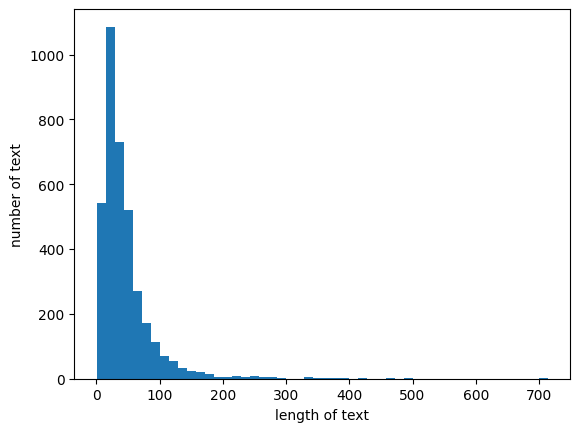

In [ ]:
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of text')
plt.ylabel('number of text')
plt.show()

In [ ]:
# 최적의 max_len 생각해보자. 전체 샘플 중의 길이가 max_len이하인 샘플의 비율이 몇 %?
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if (len(sentence) <= max_len):
      count += 1
  print('전 체 샘 플 중 길 이 가 %s 이 하 인 샘 플 의 비 율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 200
below_threshold_len(max_len, X_train)

전 체 샘 플 중 길 이 가 200 이 하 인 샘 플 의 비 율: 98.65083648138155


In [ ]:
data['label']

0          코드2
1            웹
2          코드2
3          코드2
4          코드2
         ...  
3701       코드2
3702    시스템 운영
3703        이론
3704        원격
3705        이론
Name: label, Length: 3706, dtype: object

In [ ]:
# 전체 훈련데이터중 약 96%가 텍스트의 길이가 200이하임을 확인
X_train = pad_sequences(X_train, maxlen= max_len)

In [ ]:
# x_train은 사실 전체 데이터임 -> x_train, x_test로 나눠주자.
x_train, x_test = X_train[:2595], X_train[2595:]

In [ ]:
y = data['label']

In [ ]:
data['label'] = data['label'].map({
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
})

In [ ]:
y_train, y_test = y[:2595], y[2595:]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(2595, 5)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import tensorflow as tf

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [ ]:
sequence_input = Input(shape=(max_len,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=max_len, mask_zero = True)(sequence_input)

In [ ]:
lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

In [ ]:
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 200, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [ ]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [ ]:
attention = BahdanauAttention(64) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

In [ ]:
dense1 = Dense(32, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(5, activation="softmax")(dropout)
model = Model(inputs=sequence_input, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1,
save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_data=(x_test, y_test), verbose=1, callbacks=[es, mc])

Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 1.4181 - accuracy: 0.4250
Epoch 1: val_accuracy improved from -inf to 0.42484, saving model to best_model.h5
41/41 [==============================] - 75s 1s/step - loss: 1.4181 - accuracy: 0.4250 - val_loss: 1.2481 - val_accuracy: 0.4248
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 1.1344 - accuracy: 0.4867
Epoch 2: val_accuracy improved from 0.42484 to 0.55446, saving model to best_model.h5
41/41 [==============================] - 51s 1s/step - loss: 1.1344 - accuracy: 0.4867 - val_loss: 1.1203 - val_accuracy: 0.5545
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 0.9114 - accuracy: 0.6366
Epoch 3: val_accuracy improved from 0.55446 to 0.62286, saving model to best_model.h5
41/41 [==============================] - 50s 1s/step - loss: 0.9114 - accuracy: 0.6366 - val_loss: 0.9867 - val_accuracy: 0.6229
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 0.68

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.layers import Input, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Conv1D, MaxPool1D

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.backend import clear_session

In [ ]:
# input_layer
il = Input(shape=(max_len, 5))

# Conv1D
# 32개 필터 사용할 것
# window_size(filter_size)는 10일
# activation은 swish

hl = Conv1D(filters=32, kernel_size=10, padding='valid', activation='swish')(il)

# MaxPool1D
# 필터 사이즈(window size)는 2일
hl = MaxPool1D(2)(hl)

# Bidirectional 레이어
# forward layer : LSTM, 히든스테이트 노드 24개
# backward layer : GRU, 히든스테이트 노드 16개
forward_layer = LSTM(24, return_sequences=True)
backward_layer = GRU(16, return_sequences=True, go_backwards=True)
hl = Bidirectional(layer=forward_layer, backward_layer = backward_layer)(hl)

# Bidirectional 레이어
# forward layer : LSTM, 히든스테이트 노드 24개
# backward layer : GRU, 히든스테이트 노드 24개
forward_layer = LSTM(24, return_sequences=True)
backward_layer = GRU(16, return_sequences=True, go_backwards=True)
hl = Bidirectional(layer=forward_layer, backward_layer = backward_layer)(hl)

# 플래튼
hl = Flatten()(hl)

# Fully Connected : 노드 256개, swish
hl = Dense(256, activation='swish')(hl)

# output layer
ol = Dense(5, activation='softmax')(hl)

model = Model(il, ol)

# model compile
model.compile(loss='accuracy', optimizer='adam')

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 5)]          0         
                                                                 
 conv1d (Conv1D)             (None, 191, 32)           1632      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 95, 32)           0         
 )                                                               
                                                                 
 bidirectional_2 (Bidirectio  (None, 95, 40)           7872      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 95, 40)           9024      
 nal)                                                            
                                                           

In [ ]:
data.to_csv('/content/drive/MyDrive/미니프로젝트4차/save.csv', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/미니프로젝트4차/save.csv')

train_pair = [(row[0], row[1]) for _, row in data.iterrows()]
# 문장 및 라벨 데이터 추출
train_data = [pair[0] for pair in train_pair]
train_label = [pair[1] for pair in train_pair]

print('문장: %s' %(train_data[:3]))
print('라벨: %s' %(train_label[:3]))

문장: ['selfconvs1  nnModuleListnnConv2d1 Co K 100 for K in Ks\n1 여기서 커널사이즈 K100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다', '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요', 'globglobPATH 를 사용할 때 질문입니다\n\nPATH에   가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다\n\n제공해주신 파일에 AIVLE3rdTeam 폴더가 포함되어 있는데 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다']
라벨: [0, 1, 0]


In [ ]:
# 1-1 subword학습을 위해 문장만 따로 저장
with open('/content/drive/MyDrive/미니프로젝트4차/semi_train_tokenizer.txt', 'w') as f:
  for line in train_data:
    f.write(line+'\n')

In [ ]:
# 1-1에서 저장한 파일 불러오기
with open('/content/drive/MyDrive/미니프로젝트4차/semi_train_tokenizer.txt', 'r') as f:
  test_tokenizer = f.read().split('\n')
print(test_tokenizer[:3])

['selfconvs1  nnModuleListnnConv2d1 Co K 100 for K in Ks', '1 여기서 커널사이즈 K100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다', '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요']


In [ ]:
num_word_list = [len(sentence.split()) for sentence in test_tokenizer]
print('\n코퍼스 평균/총 단어 갯수 : %.1f / %d' % (sum(num_word_list)/len(num_word_list), sum(num_word_list)))


코퍼스 평균/총 단어 갯수 : 5.0 / 117425


In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00


In [ ]:
# RUST 코드로 내부 구조가 짜여있어서 엄청 빠르게 학습된다.
import sentencepiece as spm
import os

input_file = '/content/drive/MyDrive/미니프로젝트4차/semi_train_tokenizer.txt'
vocab_size = 16000 # 단어 사전 크기

sp_model_root = 'sentencepiece'
if not os.path.isdir(sp_model_root):
  os.mkdir(sp_model_root)
sp_model_name = 'tokenizer_%d' % (vocab_size)
sp_model_path = os.path.join(sp_model_root, sp_model_name)
model_type = 'unigram'  # 학습할 모델 선택, unigram이 더 성능이 좋음'bpe'
character_coverage  = 1.0  # 전체를 cover 하기 위해, default=0.9995
user_defined_symbols = '[PAD],[UNK],[CLS],[SEP],[MASK],[BOS],[EOS],[UNK0],[UNK1],[UNK2],[UNK3],[UNK4],[UNK5],[UNK6],[UNK7],[UNK8],[UNK9],[unused0],[unused1],[unused2],[unused3],[unused4],[unused5],[unused6],[unused7],[unused8],[unused9],[unused10],[unused11],[unused12],[unused13],[unused14],[unused15],[unused16],[unused17],[unused18],[unused19],[unused20],[unused21],[unused22],[unused23],[unused24],[unused25],[unused26],[unused27],[unused28],[unused29],[unused30],[unused31],[unused32],[unused33],[unused34],[unused35],[unused36],[unused37],[unused38],[unused39],[unused40],[unused41],[unused42],[unused43],[unused44],[unused45],[unused46],[unused47],[unused48],[unused49],[unused50],[unused51],[unused52],[unused53],[unused54],[unused55],[unused56],[unused57],[unused58],[unused59],[unused60],[unused61],[unused62],[unused63],[unused64],[unused65],[unused66],[unused67],[unused68],[unused69],[unused70],[unused71],[unused72],[unused73],[unused74],[unused75],[unused76],[unused77],[unused78],[unused79],[unused80],[unused81],[unused82],[unused83],[unused84],[unused85],[unused86],[unused87],[unused88],[unused89],[unused90],[unused91],[unused92],[unused93],[unused94],[unused95],[unused96],[unused97],[unused98],[unused99]'

input_argument = '--input=%s --model_prefix=%s --vocab_size=%s --user_defined_symbols=%s --model_type=%s --character_coverage=%s'
cmd = input_argument%(input_file, sp_model_path, vocab_size,user_defined_symbols, model_type, character_coverage)

spm.SentencePieceTrainer.Train(cmd)
print('train done')

train done


In [ ]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.load('{}.model'.format(sp_model_path))

# 예시 문장
tokens = sp.encode_as_pieces(data['text'][1])
ids = sp.encode_as_ids(data['text'][1])

print(ids)
print(tokens)
print('-'*50)

tokens = sp.decode_pieces(tokens)
ids = sp.decode_ids(ids)
print(ids)
print(tokens)

[358, 299, 122, 2304, 638, 1810, 398, 6293, 128, 7001, 134, 120, 15425, 2304, 11828, 3694, 260, 368, 126, 1599, 4059, 153, 1452, 262, 135, 124, 5738, 3346, 559, 1157, 8487, 2252, 2923, 362, 1494, 136, 481, 377, 1896]
['▁현재', '▁이미지', '를', '▁여러개', '▁업로드', '▁하기', '▁위해', '▁자바스크립트', '로', '▁동적', '으로', '▁', '폼', '▁여러개', '▁생성하는데', '▁클릭', '해도', '▁생성', '이', '▁안되네요', '▁막혀', '서', '▁뭘', '▁할', '▁수', '가', '▁없네요', '▁혹시나', '▁해서', '▁기본', '▁예제코드', '로만', '▁간단', '히', '▁돌려', '도', '▁안됩니다', '▁이유가', '▁뭘까요']
--------------------------------------------------
현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요
현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요


In [ ]:
# 4. Mecab기반 형태소 단위 분절
with open('/content/drive/MyDrive/미니프로젝트4차/semi_train_tokenizer.txt', 'r') as f:
  m = f.read().split('\n')
print(m[:3])

['selfconvs1  nnModuleListnnConv2d1 Co K 100 for K in Ks', '1 여기서 커널사이즈 K100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다', '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요']


In [ ]:
from konlpy.tag import Mecab
mecab_tokenizer = Mecab().morphs
print('mecab check: ', mecab_tokenizer('KT aivle 3반 11조 화이팅 ㅋㅋ'))

mecab check:  ['KT', 'aivle', '3', '반', '11', '조', '화이팅', 'ㅋㅋ']


In [ ]:
for_generation = False # or normal

if for_generation:
    # 1: '어릴때' -> '어릴, ##때' for generation model
    total_morph=[]
    for sentence in m:
        # 문장단위 mecab 적용
        morph_sentence= []
        count = 0
        for token_mecab in mecab_tokenizer(sentence):
            token_mecab_save = token_mecab
            if count > 0:
                token_mecab_save = "##" + token_mecab_save  # 앞에 ##를 부친다
                morph_sentence.append(token_mecab_save)
            else:
                morph_sentence.append(token_mecab_save)
                count += 1
        # 문장단위 저장
        total_morph.append(morph_sentence)

else:
    # 2: '어릴때' -> '어릴, 때'   for normal case
    total_morph=[]
    for sentence in m:
        # 문장단위 mecab 적용
        morph_sentence= mecab_tokenizer(sentence)
        # 문장단위 저장
        total_morph.append(morph_sentence)
                        
print(total_morph[:3])
print(len(total_morph))

[['selfconvs', '1', 'nnModuleListnnConv', '2', 'd', '1', 'Co', 'K', '100', 'for', 'K', 'in', 'Ks'], ['1', '여기', '서', '커널', '사이즈', 'K', '100', '은', '한', '단어', '의', '최대', '길이', '가', '100', '이', '넘', '지', '않', '는다는', '가정', '으로', '그냥', '100', '으로', '선언', '한', '것', '인지', '궁금', '합니다'], ['현재', '이미지', '를', '여러', '개', '업로드', '하', '기', '위해', '자바', '스크립트', '로', '동적', '으로', '폼', '여러', '개', '생성', '하', '는', '데', '클릭', '해도', '생', '성', '이', '안', '되', '네요', '막혀서', '뭘', '할', '수', '가', '없', '네요', '혹시나', '해서', '기본', '예제', '코드', '로', '만', '간단히', '돌려도', '안', '됩니다', '이유', '가', '뭘까요']]
23416


In [ ]:
# 4-1 mecab 적용된 데이터 저장
with open('/content/drive/MyDrive/미니프로젝트4차/after_mecab.txt', 'w') as f:
  for line in total_morph:
    f.write(' '.join(line)+'\n')

In [ ]:
# 4-2 special token 선언
user_defined_symbols = ['[BOS]','[EOS]','[UNK0]','[UNK1]','[UNK2]','[UNK3]','[UNK4]']
unused_token_num = 100
unused_list = ['[unused{}]'.format(n) for n in range(unused_token_num)]
user_defined_symbols = user_defined_symbols + unused_list

print(user_defined_symbols)

['[BOS]', '[EOS]', '[UNK0]', '[UNK1]', '[UNK2]', '[UNK3]', '[UNK4]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]', '[unused31]', '[unused32]', '[unused33]', '[unused34]', '[unused35]', '[unused36]', '[unused37]', '[unused38]', '[unused39]', '[unused40]', '[unused41]', '[unused42]', '[unused43]', '[unused44]', '[unused45]', '[unused46]', '[unused47]', '[unused48]', '[unused49]', '[unused50]', '[unused51]', '[unused52]', '[unused53]', '[unused54]', '[unused55]', '[unused56]', '[unused57]', '[unused58]', '[unused59]', '[unused60]', '[unused61]', '[unused62]', '[unused63]', '[unused64]', '[unused65]', '[unused66]', '[u

In [ ]:
import os
from tokenizers import BertWordPieceTokenizer, SentencePieceBPETokenizer, CharBPETokenizer, ByteLevelBPETokenizer

In [ ]:
how_to_tokenize = BertWordPieceTokenizer

# bert내부 토크나이저는 bertwordpieceTokneizer에 해당되기 때문
if str(how_to_tokenize) == str(BertWordPieceTokenizer):
  print('BertWordPieceTokenizer')
  tokenizer = BertWordPieceTokenizer(strip_accents=False,
                                     lowercase=False)

BertWordPieceTokenizer


In [ ]:
# 5. 단어 사전 학습
corpus_file = ['/content/drive/MyDrive/미니프로젝트4차/after_mecab.txt']
vocab_size = 15000
limit_alphabet = 3000
output_path = 'hugging_%d'%(vocab_size)

tokenizer.train(files=corpus_file,
                vocab_size=vocab_size,
                min_frequency=5,
                limit_alphabet=limit_alphabet,
                show_progress=True)
print('train complete')

# mecab + BertwordPieceTokenizer
sentence = data['text'][1]
output = tokenizer.encode(sentence)
print(sentence)
print('=>idx   : %s'%output.ids)
print('=>tokens: %s'%output.tokens)
print('=>offset: %s'%output.offsets)
print('=>decode: %s\n'%tokenizer.decode(output.ids))

train complete
현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요
=>idx   : [2308, 2208, 1547, 2459, 1237, 2699, 1049, 1250, 2223, 7523, 6973, 5103, 1274, 6805, 1591, 1274, 1032, 2459, 1237, 2190, 1235, 3557, 3941, 1173, 1226, 2190, 1252, 1, 6816, 524, 1052, 650, 1256, 722, 1839, 1194, 5693, 1974, 2915, 2780, 1217, 1273, 1274, 1180, 5271, 1304, 7149, 1, 2111, 1256, 4247]
=>tokens: ['현재', '이미지', '##를', '여러', '##개', '업로드', '하', '##기', '위해', '자바', '##스크', '##립트', '##로', '동적', '##으', '##로', '폼', '여러', '##개', '생성', '##하', '##는데', '클릭', '##해', '##도', '생성', '##이', '[UNK]', '막혀서', '뭘', '할', '수', '##가', '없', '##네', '##요', '혹시나', '해서', '기본', '예제', '##코', '##드', '##로', '##만', '간단', '##히', '돌려도', '[UNK]', '이유', '##가', '뭘까요']
=>offset: [(0, 2), (3, 6), (6, 7), (8, 10), (10, 11), (12, 15), (16, 17), (17, 18), (19, 21), (22, 24), (24, 26), (26, 28), (28, 29), (30, 32), (32, 33), (33, 34), (35, 36), (37, 39), (39, 40), (41, 43), (43, 44), 

In [ ]:
# 5-1 save tokenizer
hf_model_path='tokenizer_model'
if not os.path.isdir(hf_model_path):
    os.mkdir(hf_model_path)
tokenizer.save_model(hf_model_path)  # vocab.txt 파일 한개가 만들어진다

['tokenizer_model/vocab.txt']

In [ ]:
from transformers import BertTokenizer

tokenizer_for_load = BertTokenizer.from_pretrained(hf_model_path,
                                                   strip_accents=False,
                                                   lowercase=False)
# 단어 사전 크기
print('vocab size : %d' % tokenizer_for_load.vocab_size)
tokenized_input_for_tf = tokenizer_for_load("나는 오늘 아침밥을 먹었다.", return_tensors="tf")
# 이 안에 정수인코딩과 attention mask에 내장되어있음
# 텐서플로우는 잘 적용이 안됨 파이토치로 해야함
tokenized_input_for_pytorch = tokenizer_for_load("나는 오늘 아침밥을 먹었다.", return_tensors="pt")
tokenized_input_for_tensorflow = tokenizer_for_load("나는 오늘 아침밥을 먹었다.", return_tensors="tf")

print("Tokens (str)      : {}".format([tokenizer_for_load.convert_ids_to_tokens(s) for s in tokenized_input_for_pytorch['input_ids'].tolist()[0]]))
print("Tokens (int)      : {}".format(tokenized_input_for_pytorch['input_ids'].tolist()[0]))
print("Tokens (attn_mask): {}\n".format(tokenized_input_for_pytorch['attention_mask'].tolist()[0]))

vocab size : 8098
Tokens (str)      : ['[CLS]', '나', '##는', '오늘', '아', '##침', '##밥', '##을', '먹', '##었', '##다', '[UNK]', '[SEP]']
Tokens (int)      : [2, 249, 1347, 2275, 692, 1745, 1558, 1190, 498, 1477, 1155, 1, 3]
Tokens (attn_mask): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



In [ ]:
tokenizer_for_load.all_special_tokens

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']

In [ ]:
tokenizer_for_load.save_pretrained(hf_model_path+'_special')

('tokenizer_model_special/tokenizer_config.json',
 'tokenizer_model_special/special_tokens_map.json',
 'tokenizer_model_special/vocab.txt',
 'tokenizer_model_special/added_tokens.json')

-skt/kobert-base-v1

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KOBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KOBERT.git to /tmp/pip-install-62ivige4/kobert-tokenizer_0c9324b0c3d9462c95d66b3e2c70c196
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KOBERT.git /tmp/pip-install-62ivige4/kobert-tokenizer_0c9324b0c3d9462c95d66b3e2c70c196
  Resolved https://github.com/SKTBrain/KOBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
  Created wheel for kobert_tokenizer: filename=kobert_tokenizer-0.1-py3-none-any.whl size=4645 sha256=334fe2ec3dcecd12b0531421d8b235068ae5e96ad9253f8c8b4a0929eb5bd73b
  Stored in directory: /tmp/pip-ephem-wheel-cache-mro8rkhk/wheels/ad/87/23/db84105aca5866c45fe9733c603e8d12f495c68450adf280e3
Successfully built kobert_tokenizer


In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(hf_model_path+'_special')


In [ ]:
print(tokenizer.vocab_size)
tokenized_input_for_pytorch = tokenizer(data['text'][1], return_tensors="pt")
print("token      : {}".format([tokenizer.convert_ids_to_tokens(s) for s in tokenized_input_for_pytorch['input_ids'].tolist()[0]]))
print("input_id      : {}".format(tokenized_input_for_pytorch['input_ids'].tolist()[0]))
print("attn_mask: {}\n".format(tokenized_input_for_pytorch['attention_mask'].tolist()[0]))


8098
token      : ['[CLS]', '현재', '이미지', '##를', '여러', '##개', '업로드', '하', '##기', '위해', '자바', '##스크', '##립트', '##로', '동적', '##으', '##로', '폼', '여러', '##개', '생성', '##하', '##는데', '클릭', '##해', '##도', '생성', '##이', '[UNK]', '막혀서', '뭘', '할', '수', '##가', '없', '##네', '##요', '혹시나', '해서', '기본', '예제', '##코', '##드', '##로', '##만', '간단', '##히', '돌려도', '[UNK]', '이유', '##가', '뭘까요', '[SEP]']
input_id      : [2, 2308, 2208, 1547, 2459, 1237, 2699, 1049, 1250, 2223, 7523, 6973, 5103, 1274, 6805, 1591, 1274, 1032, 2459, 1237, 2190, 1235, 3557, 3941, 1173, 1226, 2190, 1252, 1, 6816, 524, 1052, 650, 1256, 722, 1839, 1194, 5693, 1974, 2915, 2780, 1217, 1273, 1274, 1180, 5271, 1304, 7149, 1, 2111, 1256, 4247, 3]
attn_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



In [ ]:
data

,text,label
0,selfconvs1 nnModuleListnnConv2d1 Co K 100 for...,0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,globglobPATH 를 사용할 때 질문입니다\n\nPATH에 가 포함되면 제...,0
3,tmpp tmpgroupbyby Addr1 asindexFalseCategory...,0
4,filename TESTIMAGE + strroundframesec + jpg\n...,0
...,...,...
3701,토큰화 이후 train val 를 분리하고 각 train set val set에 벡...,0
3702,올린 값들 중 최고점인 건가요 아니면 최근에 올린 파일로 무조건 갱신인가요\n최고점...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1 IT 인프라...,2
3704,inplace True 해도 값이 변경이 안되고 none으로 뜹니다 혹시 원격지원 ...,4


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)
train, val = train_test_split(train, test_size=0.2, random_state=0)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# val_labels = to_categorical(val_labels)

In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained(hf_model_path+'_special')

In [ ]:
train['text'].iat[2]

'실습1의 피드백 부탁드립니다\n문제가 여러개가 된다면 꼭 하나의 해결방안으로 수렴해야 될까요\n예를 들어 지금 저는 두 가지 정도의 연관된 문제점을 하나의 해결방안으로 수렴되는 식으로 작성하였는데\n첨부파일의 내용과 더불어 오프라인 매장의 증가 와 관련된 문제점도 작성하게 된다면 이러한 해결방안을 같이 작성해도 되는 걸까요\n그리고 IT서비스와 같은 해결방안만 가능한 것일까요 아님 전문인력 추가와 같은 해결방안도 가능한 것일까요'

In [ ]:
print(tokenizer.tokenize(train['text'].iat[2]))

['실습', '##1', '##의', '피드백', '부탁드립니다', '문제', '##가', '여러', '##개', '##가', '된다면', '꼭', '하나', '##의', '해결', '##방', '##안', '##으', '##로', '수', '##렴', '##해', '##야', '될까요', '예', '##를', '들어', '지금', '저', '##는', '두', '가지', '정도', '##의', '[UNK]', '문제점', '##을', '하나', '##의', '해결', '##방', '##안', '##으', '##로', '[UNK]', '식', '##으', '##로', '작성', '##하', '##였', '##는데', '첨부', '##파', '##일', '##의', '내용', '##과', '더불', '##어', '오프', '##라인', '매장', '##의', '증가', '와', '[UNK]', '문제점', '##도', '작성', '##하', '##게', '된다면', '이러', '##한', '해결', '##방', '##안', '##을', '같이', '작성', '##해', '##도', '되', '##는', '걸까요', '그리고', 'it', '##서', '##비', '##스', '##와', '같', '##은', '해결', '##방', '##안', '##만', '가능', '##한', '것', '##일', '##까요', '아님', '전문', '##인', '##력', '추가', '##와', '같', '##은', '해결', '##방', '##안', '##도', '가능', '##한', '것', '##일', '##까요']


In [ ]:
import warnings
warnings.filterwarnings('ignore')

max_seq_len = 200
encoded_result = tokenizer.encode(train['text'].iat[0], max_length=max_seq_len, pad_to_max_length=True)
print(encoded_result)
print('길이: ', len(encoded_result))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[2, 1952, 1235, 1199, 1194, 3198, 1252, 2114, 1235, 2097, 1049, 1594, 1284, 1963, 3323, 1961, 1273, 1914, 68, 1136, 3935, 1275, 1413, 1337, 1284, 2613, 1173, 1345, 1538, 1485, 2582, 1252, 1469, 1924, 1361, 1190, 2529, 842, 1337, 3147, 1256, 2114, 1185, 1920, 68, 1145, 7362, 2529, 1337, 1284, 1964, 1235, 1347, 3075, 1137, 1347, 4810, 5255, 1154, 1920, 68, 1181, 7362, 2529, 1337, 1284, 1924, 1547, 2240, 1173, 1256, 1475, 2748, 1303, 1599, 1173, 1226, 2807, 1404, 1920, 2169, 3835, 1953, 7658, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
길이:  200


In [ ]:
def bert_preprocessing(examples, labels, max_seq_len, tokenizer):
  # 1. word_embedding을 수행하기 위한 문장의 정수 인코딩
  input_ids = []
  # 2. attention_masks 실제 단어가 위치하면 1, 아니면 0
  attention_masks = []
  # 3. 문장의 구분을 위한 세그먼트 인코딩
  token_type_ids = []
  data_labels = []

  for example, label in tqdm(zip(examples, labels), total=len(examples)):
    encoding_result = tokenizer.encode_plus(example, max_length=max_seq_len, pad_to_max_length=True)

    # padding_count = input_id.count(tokenizer.pad_token_id)
    # attention_mask = [1] * (max_seq_len - padding_count) + [0] * padding_count

    # token_type_id = [0] * max_seq_len
    

    input_ids.append(encoding_result['input_ids'])
    attention_masks.append(encoding_result['attention_mask'])
    token_type_ids.append(encoding_result['token_type_ids'])
    

  input_ids = np.array(input_ids, dtype=int)
  attention_masks = np.array(attention_masks, dtype=int)
  token_type_ids = np.array(token_type_ids, dtype=int)

    
  return (input_ids, attention_masks, token_type_ids)

In [ ]:
x_train = bert_preprocessing(train['text'], train['label'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 2371/2371 [00:00<00:00, 3382.95it/s]


In [ ]:
x_val =  bert_preprocessing(val['text'], val['label'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 593/593 [00:00<00:00, 3761.26it/s]


In [ ]:
x_test = bert_preprocessing(test['text'], test['label'], max_seq_len=max_seq_len, tokenizer=tokenizer)

100%|██████████| 742/742 [00:00<00:00, 3637.18it/s]


In [ ]:
y_train = train['label'].to_list()
y_val = val['label'].to_list()
y_test = test['label'].to_list()

In [ ]:
# 첫번째 훈련데이터 출력
input_id = x_train[0][0]
attention_mask = x_train[1][0]
token_type_id = x_train[2][0]
label = y_train[0]

print('단어에 대한 정수 인코딩: ', input_id)
print('어텐션 마스크: ',  attention_mask)
print('세그먼트 인코딩: ', token_type_id)
print('각 인코딩의 길이: ', len(input_id))
print('정수 인코딩 복원(디코딩):', tokenizer.decode(input_id))
print('레이블:', label)

단어에 대한 정수 인코딩:  [   2 1952 1235 1199 1194 3198 1252 2114 1235 2097 1049 1594 1284 1963
 3323 1961 1273 1914   68 1136 3935 1275 1413 1337 1284 2613 1173 1345
 1538 1485 2582 1252 1469 1924 1361 1190 2529  842 1337 3147 1256 2114
 1185 1920   68 1145 7362 2529 1337 1284 1964 1235 1347 3075 1137 1347
 4810 5255 1154 1920   68 1181 7362 2529 1337 1284 1924 1547 2240 1173
 1256 1475 2748 1303 1599 1173 1226 2807 1404 1920 2169 3835 1953 7658
    3    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 

In [ ]:
from transformers import TFBertForSequenceClassification, TFBertModel

In [ ]:
max_seq_len = 200 # 입력 문장의 길이

input_ids_layer = tf.keras.layers.Input(shape=(max_seq_len, ), dtype=tf.int32)
attention_masks_layer = tf.keras.layers.Input(shape=(max_seq_len, ), dtype=tf.int32)
token_type_ids_layer = tf.keras.layers.Input(shape=(max_seq_len, ), dtype=tf.int32)

outputs= model([input_ids_layer, attention_masks_layer, token_type_ids_layer])

In [ ]:
class TFBertForSequenceClassification(tf.keras.Model):
  def __init__(self, model_name, num_labels):
    super(TFBertForSequenceClassification, self).__init__()
    self.bert = TFBertModel.from_pretrained(model_name, from_pt=True)
    self.classifier = tf.keras.layers.Dense(num_labels, kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02),
                                            activation='softmax',
                                            name='classifier')
    
  def call(self, inputs):
    input_ids, attention_mask, token_type_ids = inputs
    outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
    cls_token = outputs[1]
    prediction = self.classifier(cls_token)
    return prediction

In [ ]:
model = TFBertForSequenceClassification(hf_model_path+'_special', num_labels=5)
model.compile(optimizer='adam' ,loss='categorical_crossentropy', metrics=['accuracy'])

OSError: ignored

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

(2371, 5)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_loss", 
    min_delta=0.001, # the threshold that triggers the termination (acc should at least improve 0.001)
    patience=5,
    restore_best_weights=True)

# model.fit(
#     train_dataset.shuffle(1000).batch(16), epochs=5, batch_size=16,
#     validation_data=val_dataset.shuffle(1000).batch(16),
#     callbacks = [callback_earlystop]
# )

model.fit(
    x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), callbacks=[callback_earlystop]
)

Epoch 1/30
38/38 [==============================] - 12s 307ms/step - loss: 1.3919 - accuracy: 0.4319 - val_loss: 1.4448 - val_accuracy: 0.4233
Epoch 2/30
38/38 [==============================] - 11s 296ms/step - loss: 1.3976 - accuracy: 0.4319 - val_loss: 1.4199 - val_accuracy: 0.4233
Epoch 3/30
24/38 [=================>............] - ETA: 3s - loss: 1.3914 - accuracy: 0.4160

KeyboardInterrupt: ignored

In [ ]:
!pip install gluonnlp pandas tqdm   
!pip install mxnet
!pip install sentencepiece==0.1.91
!pip install transformers==4.8.2
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp39-cp39-linux_x86_64.whl size=680541 sha256=cbd739aa32fb199ee876f9e94ee515fced358cbf1eb49df6fe7e416ad77f4e0c
  Stored in directory: /root/.cache/pip/wheels/47/17/70/b257bc53879a458c4bfcc900e89271aa8b4f19366a54bd2455
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-3he2wm16/kobert-tokenizer_3f26f8d586c346f4a3679b7c54a264cc
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-3he2wm16/kobert-tokenizer_3f26f8d586c346f4a3679b7c54a264cc
  Resolved https://github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-c_5lonuh
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-c_5lonuh
  Resolved https://****@github.com/SKTBrain/KoBERT.git to commit 47a69af87928fc24e20f571fe10c3cc9dd9af9a3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from KOBERT.kobert.pytorch_kobert import get_kobert_model
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel, vocab = get_kobert_model('skt/kobert-base-v1',tokenizer.vocab_file)

ModuleNotFoundError: ignored

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
import pandas as pd

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup
from transformers import BertModel

#GPU 사용 시
device = torch.device("cuda:0")